In [245]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy.stats import multivariate_normal


In [248]:
# define multivariate gaussian
mu = torch.Tensor([0.5, 0.5])
cov = 0.1 * torch.eye(2)



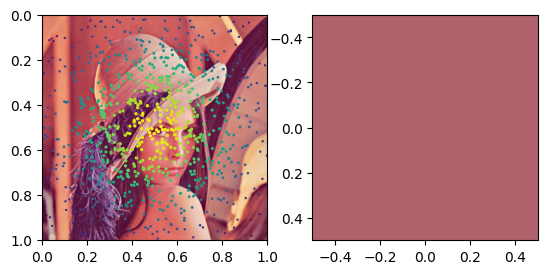

In [251]:
def signal_under_gaussian(mu, cov, signal, N_points=100):
    gaussian = multivariate_normal(mu, cov)

    # sample points
    samples = gaussian.rvs(size=N_points)

    # filter samples from out of domain
    samples = torch.Tensor(
        np.array([s for s in samples if (s >= 0).all() and (s <= 1).all()])
    )

    # get pdf of each sample
    samples_pdf = gaussian.pdf(samples)
    samples_weights = samples_pdf / samples_pdf.sum()

    colors = torch.zeros(len(samples), 3)
    for i in range(len(samples)):
        colors[i] = signal(samples[i])

    wsum = torch.sum(colors * samples_weights.reshape(-1, 1), dim=0)

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(im.permute(1, 2, 0), extent=[0, 1, 1, 0])
    axs[0].scatter(
        x=samples[:, 0], y=samples[:, 1],
        c=samples_weights,
        s=1000 * samples_weights
    )
    axs[1].imshow(wsum.reshape(1, 1, 3))
    plt.show()
    
    return wsum


In [253]:
random_mean = np.random.uniform(low=0, high=1, size=(1, 2))
random_scale = np.random.uniform()